# U.S. Medical Insurance Costs

In [1]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import *
insurance = read_csv('insurance.csv')

In [2]:
ages = insurance ["age"]
sexes = insurance ["sex"]
bmis = insurance ["bmi"]
num_kids = insurance ["children"]
smoker_statuses = insurance ["smoker"]
regions = insurance ["region"]
insurance_charges = insurance ["charges"]

In [3]:
class US_Insurance:
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_kids, patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_kids = patients_num_kids
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges
        
            
    def age_average(self):
        age_and_charge = zip(ages, insurance_charges)
        count_y_20 = 0 
        count_21_30 = 0
        count_31_40 = 0
        count_41_50 = 0
        count_51_60 = 0
        count_61_o = 0
        for age, insurance_charge in age_and_charge:
            if age <= 20:   
                count_y_20 += 1
            elif age >= 21 and age <= 30:
                count_21_30 += 1
            elif age >= 31 and age <= 40:
                count_31_40 += 1
            elif age >= 41 and age <= 50:
                count_41_50 += 1
            elif age >= 51 and age <= 60:
                count_51_60 += 1
            else:
                count_61_o += 1
                
        mean_count_y_20 = insurance.query("age<=20").charges.mean()
        mean_count_21_30 = insurance.query("age>=21 & age<=30").charges.mean() 
        mean_count_31_40 = insurance.query("age>=31 & age<=40").charges.mean()
        mean_count_41_50 = insurance.query("age>=41 & age<=50").charges.mean()
        mean_count_51_60 = insurance.query("age>=51 & age<=60").charges.mean()
        mean_count_61_o = insurance.query("age<=61").charges.mean()

        print("The sum for the ages: \n20s and less are",
              count_y_20,"and the average of annual charges", mean_count_y_20,
              "\ncorresponding for 21 to 30 is", count_21_30, "and annual charges", mean_count_21_30,
             "\nfor 31 to 40 is", count_31_40, "and charges", mean_count_31_40, 
             "\nfor 41 to 50 is", count_41_50, "and charges", mean_count_41_50, 
             "\nfor 51 to 60 is", count_51_60, "and charges", mean_count_51_60, 
             "\nand last 61 and over are", count_61_o, "and charges", mean_count_61_o)
        
        age = np.array(["> 20", "21 - 30", "31 - 40", "41 - 50", "51 - 60", "60 <"])
        charges = np.array([mean_count_y_20, mean_count_21_30, mean_count_31_40, mean_count_41_50, mean_count_51_60, mean_count_61_o])

        plt.title("Group of ages / Average of charges", fontsize=20)
        plt.xlabel("Group of ages", color='tab:blue', fontsize=15)
        plt.ylabel("Average of charges", color='tab:blue', fontsize=15)
        plt.bar(age,charges)
        plt.show()
        
        
    def sex_average(self):
        females = 0
        males = 0
        
        for sex in sexes:
            if sex == 'female':
                females += 1
            elif sex == 'male':
                males += 1
            
        y = np.array([females, males])
        mylabels = ["Females", "Males"]
        myexplode = [0.2, 0]

        
        plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.2f%%', shadow = True)
        plt.title("Average of Males and Females\n")
        plt.show() 
        #####
        smoker_woman = insurance.loc[(insurance["sex"]=="female") & (insurance["smoker"]=="yes"),["bmi", "charges"]].mean()
        non_smoker_woman = insurance.loc[(insurance["sex"]=="female") & (insurance["smoker"]=="no"),["bmi", "charges"]].mean()
        #####
        smoker_man = insurance.loc[(insurance["sex"]=="male") & (insurance["smoker"]=="yes"),["bmi", "charges"]].mean()
        non_smoker_man = insurance.loc[(insurance["sex"]=="male") & (insurance["smoker"]=="no"),["bmi", "charges"]].mean()
        
        print("The average of charges and BMI for a smoker woman are:\n", 
              smoker_woman,
              "\n-----------------"
              "\nand for no smoker woman are:\n",non_smoker_woman,
              "\n-----------------\n-----------------"
             "\nand for a smoker man the averages are\n:", smoker_man,
              "\n-----------------"
             "\nand for no smoker man are:\n", non_smoker_man)
        
    
    def smoker_average(self):
        smokers_and_kids = zip(num_kids, smoker_statuses)
        kids_0_yes = 0
        kids_1_yes = 0
        kids_2_yes = 0
        kids_3_yes = 0
        kids_0_no = 0
        kids_1_no = 0
        kids_2_no = 0
        kids_3_no = 0
        for kids, smoker in smokers_and_kids:
            if kids == 0 and smoker == "yes":
                kids_0_yes += 1
            elif kids ==1 and smoker =="yes":
                kids_1_yes += 1
            elif kids == 2 and smoker == "yes":
                kids_2_yes += 1
            elif kids >= 3 and smoker == "yes":
                kids_3_yes += 1
            elif kids == 0 and smoker == "no":
                kids_0_no += 1
            elif kids ==1 and smoker =="no":
                kids_1_no += 1
            elif kids == 2 and smoker == "no":
                kids_2_no += 1
            elif kids >= 3 and smoker == "no":
                kids_3_no += 1

        
        smoker_0_kids = insurance[(insurance['smoker']== "yes") & (insurance['children'] == 0)]["charges"].mean()
        no_smoker_0_kids = insurance[(insurance['smoker']== "no") & (insurance['children'] == 0)]["charges"].mean()
        smoker_1_kids = insurance[(insurance['smoker']== "yes") & (insurance['children'] == 1)]["charges"].mean()
        no_smoker_1_kids = insurance[(insurance['smoker']== "no") & (insurance['children'] == 1)]["charges"].mean()
        smoker_2_kids = insurance[(insurance['smoker']== "yes") & (insurance['children'] == 2)]["charges"].mean()
        no_smoker_2_kids = insurance[(insurance['smoker']== "no") & (insurance['children'] == 2)]["charges"].mean()
        smoker_3_kids = insurance[(insurance['smoker']== "yes") & (insurance['children'] >= 3)]["charges"].mean()
        no_smoker_3_kids = insurance[(insurance['smoker']== "no") & (insurance['children'] >= 3)]["charges"].mean()
        ave_no_smokers= (sum(insurance["smoker"] == "no")/len(insurance["smoker"]))*100
        ave_smokers= (sum(insurance["smoker"] == "yes")/len(insurance["smoker"]))*100
        
        print("The smokers with 0 kids are", kids_0_yes, "and the average of their charges is", smoker_0_kids,
             "\nThe smokers with 1 kid are", kids_1_yes, "and the average of their charges is", smoker_1_kids,
             "\nThe smokers with 2 kids are", kids_2_yes, "and the average of their charges is", smoker_2_kids,
             "\nThe smokers with 3 kids are", kids_3_yes, "and the average of their charges is", smoker_3_kids,
             "\nThe non smokers with 0 kids are", kids_0_no, "and the average of their charges is", no_smoker_0_kids,
             "\nThe non smokers with 1 kid are", kids_1_no, "and the average of their charges is", no_smoker_1_kids,
             "\nThe non smokers with 2 kids are", kids_2_no, "and the average of their charges is", no_smoker_2_kids,
             "\nThe non smokers with 3 kids are", kids_3_no, "and the average of their charges is", no_smoker_3_kids,
             "\nThe total averagre of smokers is",round(ave_smokers),"% and the non smokers is", round(ave_no_smokers),"%" )
        
    def region_average(self):
        all_region = []
        for region in regions:
            if region not in all_region: 
                all_region.append(region)
        smoker_charges_region_0 = insurance[(insurance["region"]==all_region[0]) & (insurance["smoker"] == "yes")]["charges"].mean()
        no_smoker_charges_region_0 = insurance[(insurance["region"]==all_region[0]) & (insurance["smoker"] == "no")]["charges"].mean()
        smoker_charges_region_1 = insurance[(insurance["region"]==all_region[1]) & (insurance["smoker"] == "yes")]["charges"].mean()
        no_smoker_charges_region_1 = insurance[(insurance["region"]==all_region[1]) & (insurance["smoker"] == "no")]["charges"].mean()
        smoker_charges_region_2 = insurance[(insurance["region"]==all_region[2]) & (insurance["smoker"] == "yes")]["charges"].mean()
        no_smoker_charges_region_2 = insurance[(insurance["region"]==all_region[2]) & (insurance["smoker"] == "no")]["charges"].mean()
        smoker_charges_region_3 = insurance[(insurance["region"]==all_region[3]) & (insurance["smoker"] == "yes")]["charges"].mean()
        no_smoker_charges_region_3 = insurance[(insurance["region"]==all_region[3]) & (insurance["smoker"] == "no")]["charges"].mean()

        print("For the region of", all_region[0], "the charges for smokers are", smoker_charges_region_0,"and for non smokers",no_smoker_charges_region_0,
             "\nFor the region of", all_region[1], "the charges for smokers are", smoker_charges_region_1,"and for non smokers",no_smoker_charges_region_1,
             "\nFor the region of", all_region[2], "the charges for smokers are", smoker_charges_region_2,"and for non smokers",no_smoker_charges_region_2,
             "\nFor the region of", all_region[3], "the charges for smokers are", smoker_charges_region_3,"and for non smokers",no_smoker_charges_region_3,)  
        

In [4]:
us_insurance = US_Insurance(ages, sexes, bmis, num_kids, smoker_statuses, regions, insurance_charges)

The sum for the ages: 
20s and less are 166 and the average of annual charges 8713.482412584337 
corresponding for 21 to 30 is 278 and annual charges 9806.025289100717 
for 31 to 40 is 257 and charges 11639.308653151753 
for 41 to 50 is 281 and charges 14782.043077117436 
for 51 to 60 is 265 and charges 17062.29276286792 
and last 61 and over are 91 and charges 12870.58239885748


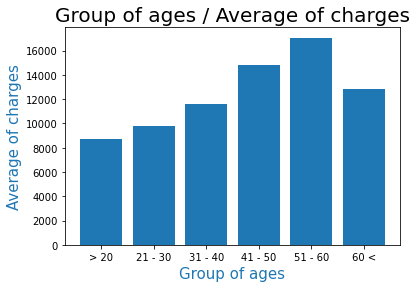

In [5]:
us_insurance.age_average()

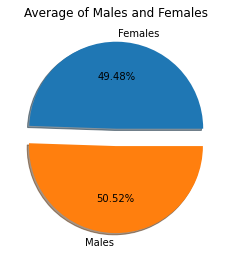

The average of charges and BMI for a smoker woman are:
 bmi           29.608261
charges    30678.996276
dtype: float64 
-----------------
and for no smoker woman are:
 bmi          30.539525
charges    8762.297300
dtype: float64 
-----------------
-----------------
and for a smoker man the averages are
: bmi           31.504182
charges    33042.005975
dtype: float64 
-----------------
and for no smoker man are:
 bmi          30.770580
charges    8087.204731
dtype: float64


In [6]:
us_insurance.sex_average()

In [7]:
us_insurance.smoker_average()

The smokers with 0 kids are 115 and the average of their charges is 31341.363953652173 
The smokers with 1 kid are 61 and the average of their charges is 31822.654334262297 
The smokers with 2 kids are 55 and the average of their charges is 33844.2357549091 
The smokers with 3 kids are 43 and the average of their charges is 31974.227587441856 
The non smokers with 0 kids are 459 and the average of their charges is 7611.7933347908465 
The non smokers with 1 kid are 263 and the average of their charges is 8303.109350038027 
The non smokers with 2 kids are 185 and the average of their charges is 9493.093673675678 
The non smokers with 3 kids are 157 and the average of their charges is 9810.880506751591 
The total averagre of smokers is 20 % and the non smokers is 80 %


In [8]:
us_insurance.region_average()

For the region of southwest the charges for smokers are 32269.0634936207 and for non smokers 8019.284513071164 
For the region of southeast the charges for smokers are 34844.99682362637 and for non smokers 8032.216308937727 
For the region of northwest the charges for smokers are 30192.003182413788 and for non smokers 8556.463715205993 
For the region of northeast the charges for smokers are 29673.536472835818 and for non smokers 9165.531671708171
